In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random


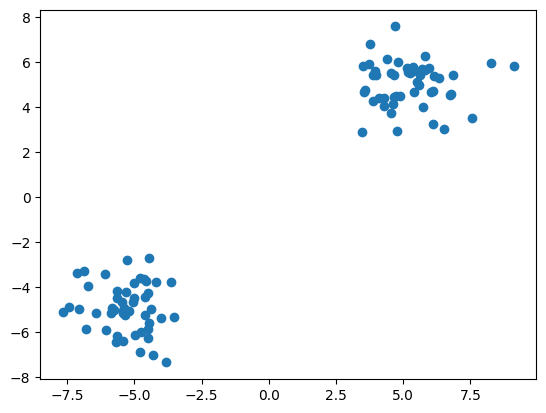

In [14]:
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]

x,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(x[:,0],x[:,1])
plt.show()

In [65]:
import random
import numpy as np

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, x):
        random_index = random.sample(range(0, x.shape[0]), self.n_clusters)
        self.centroids = x[random_index]
        self.assign_clusters(x)

        for i in range(self.max_iter):
            cluster_list = self.assign_clusters(x)
            new_centroids = self.move_centroids(x, cluster_list)

            if np.allclose(self.centroids, new_centroids):
                print(f"Converged after {i+1} iterations.")
                break

            self.centroids = new_centroids

        return self.cluster_list

    def assign_clusters(self, x):
        self.cluster_list = []
        for i in range(x.shape[0]):
            min_dis = float('inf')
            cluster = -1
            for j in range(self.n_clusters):
                distance = np.linalg.norm(x[i] - self.centroids[j])
                if distance < min_dis:
                    min_dis = distance
                    cluster = j
            self.cluster_list.append(cluster)
        return self.cluster_list

    def move_centroids(self, x, cluster_list):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = x[np.array(cluster_list) == i]
            if len(cluster_points) == 0:
                new_centroids.append(self.centroids[i])
            else:
                new_centroids.append(np.mean(cluster_points, axis=0))
        return np.vstack(new_centroids)


In [71]:
km = KMeans(n_clusters=2,max_iter=100)
km_predict = km.fit_predict(x)


Converged after 3 iterations.


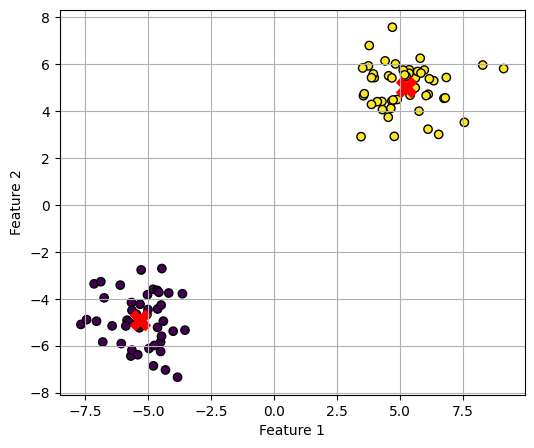

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=km_predict, cmap='viridis', edgecolor='k')
plt.scatter(km.centroids[:, 0], km.centroids[:, 1],s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
